<a href="https://colab.research.google.com/github/Himagination/time_series/blob/main/Time_Series_Analysis_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
!pip install --quiet -U statsmodels

In [83]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

File ‘airline_passengers.csv’ already there; not retrieving.



In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv("airline_passengers.csv", 
                 index_col="Month", 
                 parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


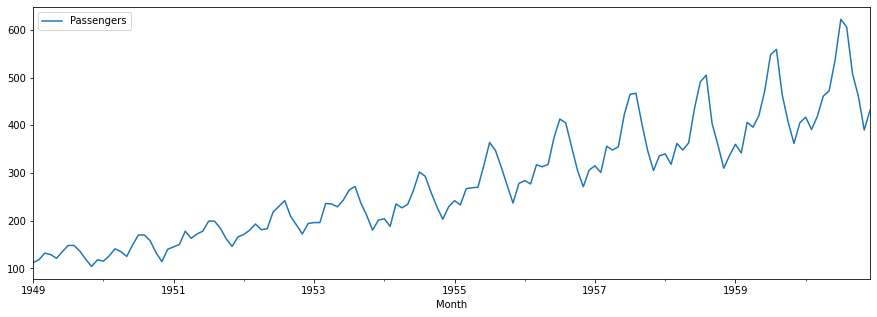

In [86]:
df.plot(figsize=(15, 5));

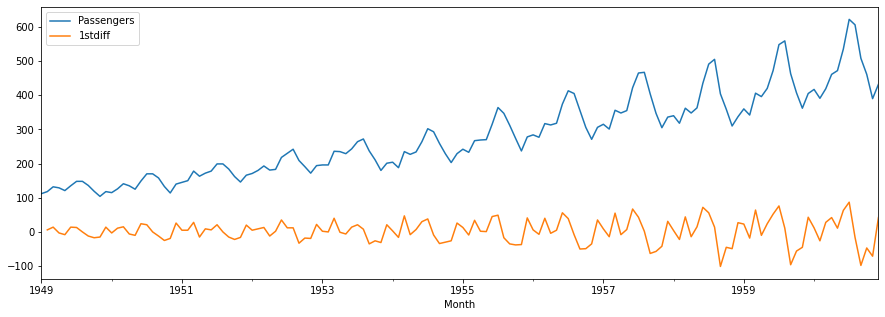

In [87]:
df["1stdiff"] = df["Passengers"].diff()
df.plot(figsize=(15, 5));

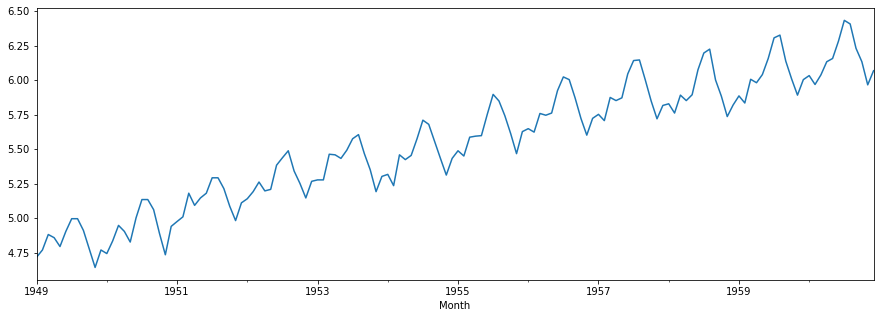

In [88]:
df["LogPassengers"] = np.log(df["Passengers"])
df["LogPassengers"].plot(figsize=(15, 5));

In [89]:
from statsmodels.tsa.arima.model import ARIMA

In [90]:
df.index.freq = "MS"
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [91]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [92]:
arima = ARIMA(train["Passengers"], order=(1, 0, 0))
arima_result = arima.fit()

In [93]:
df.loc[train_idx, "AR(1)"] = arima_result.predict(start=train.index[0], 
                                                  end=train.index[-1])

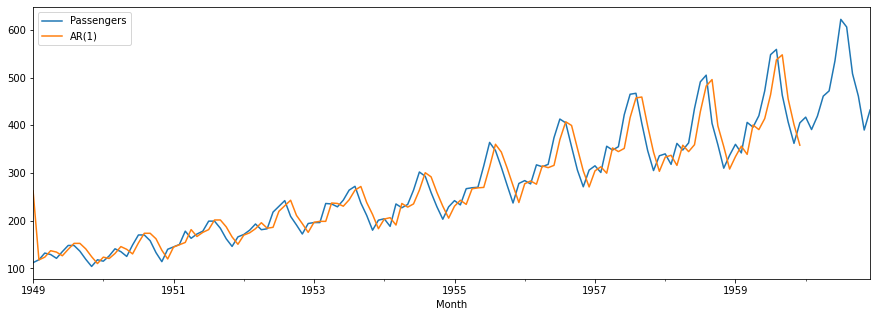

In [94]:
df[["Passengers", "AR(1)"]].plot(figsize=(15, 5));

In [95]:
prediction_result = arima_result.get_forecast(Ntest)
forecast = prediction_result.predicted_mean
df.loc[test_idx, "AR(1)"] = forecast

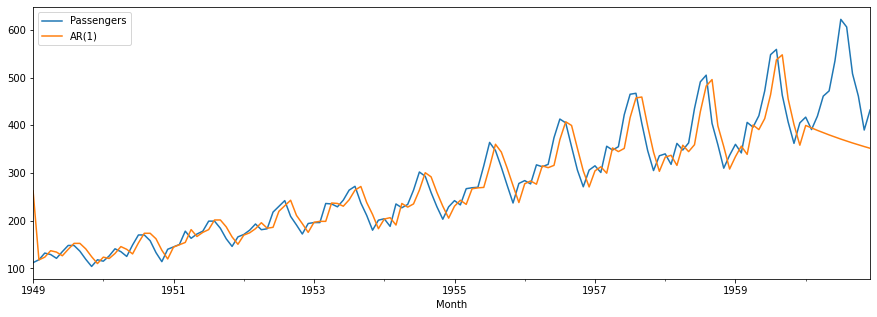

In [96]:
df[["Passengers", "AR(1)"]].plot(figsize=(15, 5));

In [97]:
# Confidence Interval
prediction_result.conf_int()

,lower Passengers,upper Passengers
1960-01-01,338.658210,460.451500
1960-02-01,309.826171,478.809354
1960-03-01,287.732168,490.829380
1960-04-01,269.338255,499.534230
1960-05-01,253.432283,506.121348
1960-06-01,239.373402,511.217438
1960-07-01,226.768867,515.201639
1960-08-01,215.354569,518.324977
1960-09-01,204.941149,520.764225
1960-10-01,195.386336,522.649550


In [98]:
def plot_fit_and_forecast(result):
  fig, ax = plt.subplots(figsize=(15, 5))
  ax.plot(df["Passengers"], label="data")

  # Plot the curve fitted on train set
  train_pred = result.fittedvalues
  ax.plot(train.index, train_pred, color="green", label="fitted")

  # Forecast the Test Set
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int["lower Passengers"], conf_int["upper Passengers"]
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label="forecast")
  ax.fill_between(test.index, 
                  lower, upper, 
                  color="red", 
                  alpha=0.3)
  ax.legend()

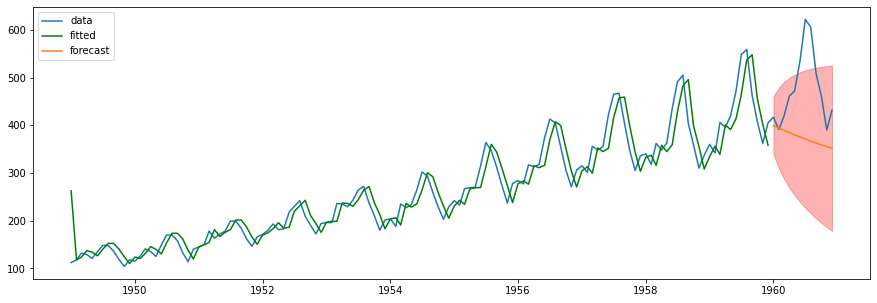

In [99]:
plot_fit_and_forecast(arima_result)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


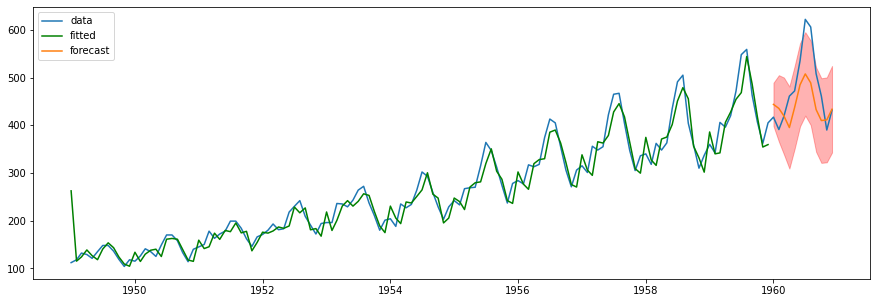

In [100]:
arima = ARIMA(train["Passengers"], order=(10, 0, 0))
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

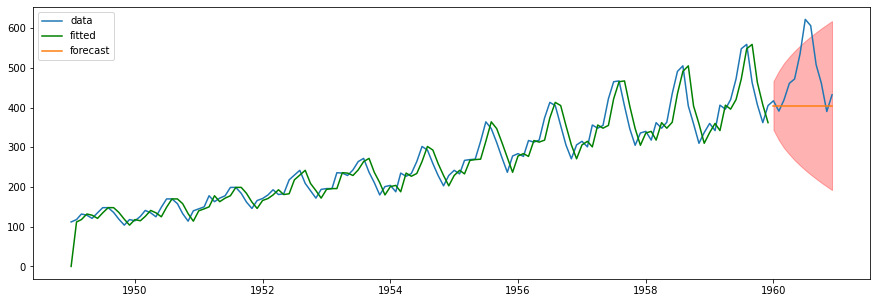

In [101]:
arima = ARIMA(train["Passengers"], order=(0, 1, 0))
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

In [102]:
df["Log1stDiff"] = df["LogPassengers"].diff()

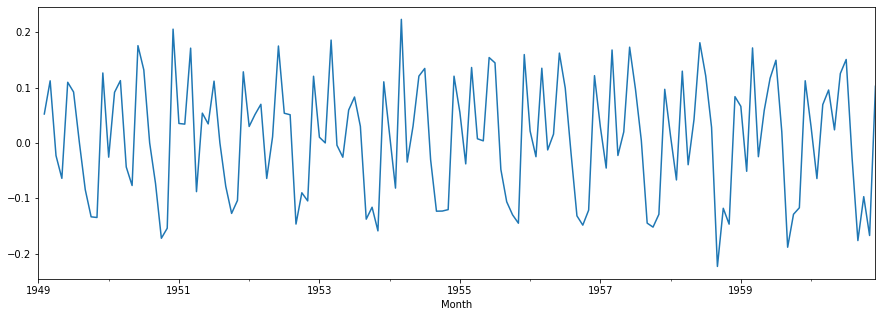

In [103]:
df["Log1stDiff"].plot(figsize=(15, 5));

In [104]:
arima = ARIMA(train["Passengers"], order=(8, 1, 1))
arima_result_811 = arima.fit()

In [105]:
def plot_fit_and_forecast_int(result, d, col="Passengers"):
  fig, ax = plt.subplots(figsize=(15, 5))
  ax.plot(df[col], label="data")

  # Plot the curve fitted on train set
  train_pred = result.predict(start=train.index[d], 
                              end=train.index[-1])
  ax.plot(train.index[d:], 
          train_pred, 
          color="green", 
          label="fitted")
  
  # Forecast the test set
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int[f"lower {col}"], conf_int[f"upper {col}"]
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label="forecast")
  ax.fill_between(test.index, 
                  lower, 
                  upper, 
                  color="red", 
                  alpha=0.3)
  ax.legend()

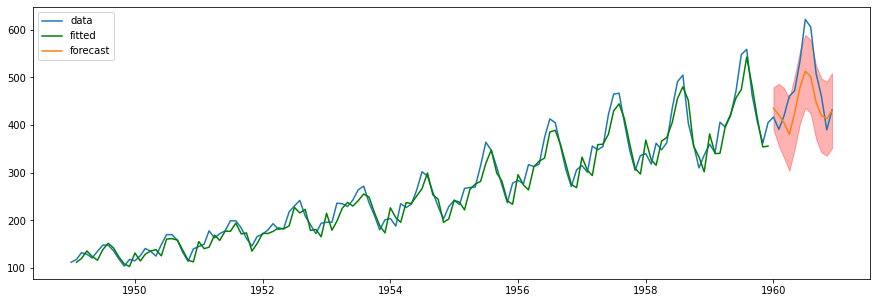

In [106]:
plot_fit_and_forecast_int(arima_result_811, 1)

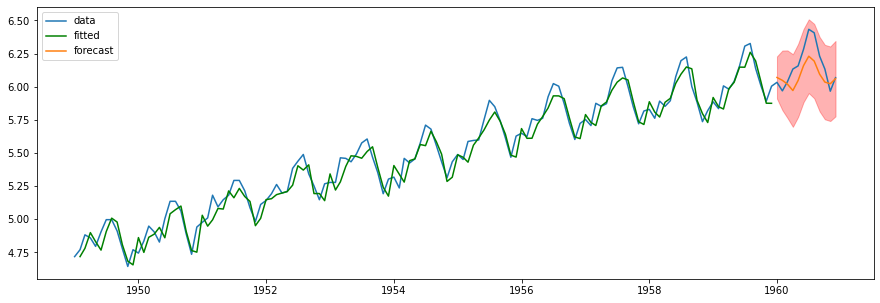

In [107]:
arima = ARIMA(train["LogPassengers"], order=(8, 1, 1))
arima_result_log811 = arima.fit()
plot_fit_and_forecast_int(arima_result_log811, 1, col="LogPassengers")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


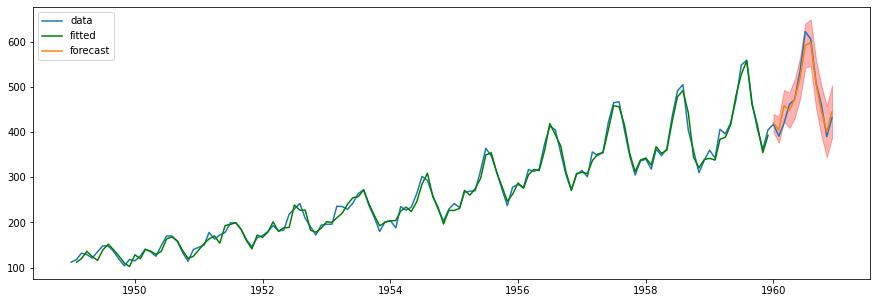

In [108]:
arima = ARIMA(train["Passengers"], order=(12, 1, 0))
arima_result_1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_1210, 1, col="Passengers")

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


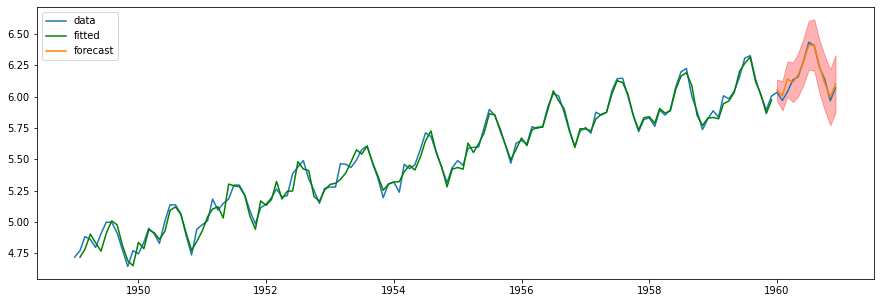

In [109]:
arima = ARIMA(train["LogPassengers"], order=(12, 1, 0))
arima_result_log1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_log1210, 1, col="LogPassengers")

In [110]:
def rmse(result, is_logged):
  forecast = result.forecast(Ntest)
  if is_logged:
    forecast = np.exp(forecast)
  
  t = test["Passengers"]
  y = forecast
  return np.sqrt(np.mean((t-y)**2))

In [111]:
print("ARIMA(8, 1, 1):", rmse(arima_result_811, False))
print("ARIMA(8, 1, 1) logged:", rmse(arima_result_log811, True))
print("ARIMA(12, 1, 0):", rmse(arima_result_1210, False))
print("ARIMA(12, 1, 0) logged:", rmse(arima_result_log1210, True))

ARIMA(8, 1, 1): 59.06458899703721
ARIMA(8, 1, 1) logged: 61.600013538195164
ARIMA(12, 1, 0): 17.51982503680274
ARIMA(12, 1, 0) logged: 16.115369503583388


# Stationarity

In [112]:
from statsmodels.tsa.stattools import adfuller

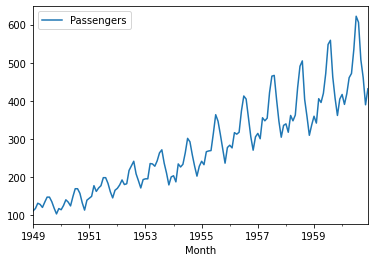

In [113]:
df = pd.read_csv("airline_passengers.csv", 
                 index_col="Month", 
                 parse_dates=True)
df.plot();

In [114]:
adfuller(df["Passengers"])

(0.8153688792060472,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.6929308390189)

In [115]:
def adf(x):
  res = adfuller(x)
  print("Test Statistic: ", res[0])
  print("P-Value: ", res[1])
  if res[1] < 0.05:
    print("Stationary")
  else:
    print("Non-Stationary")

In [116]:
adf(df["Passengers"])

Test Statistic:  0.8153688792060472
P-Value:  0.991880243437641
Non-Stationary


In [117]:
adf(np.random.randn(100))

Test Statistic:  -10.10909079247684
P-Value:  1.0114525040592902e-17
Stationary


In [118]:
adf(np.random.gamma(1, 1, 100))

Test Statistic:  -8.074876113566617
P-Value:  1.514910182493957e-12
Stationary


In [119]:
df["LogPassengers"] = np.log(df["Passengers"])

In [120]:
adf(df["LogPassengers"])

Test Statistic:  -1.7170170891069603
P-Value:  0.4223667747703914
Non-Stationary


In [121]:
df["Diff"] = df["Passengers"].diff()

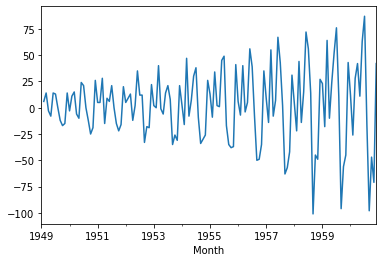

In [122]:
df["Diff"].plot()

In [123]:
adf(df["Diff"].dropna())

Test Statistic:  -2.8292668241700056
P-Value:  0.054213290283824704
Non-Stationary


In [124]:
df["DiffLog"] = df["LogPassengers"].diff()

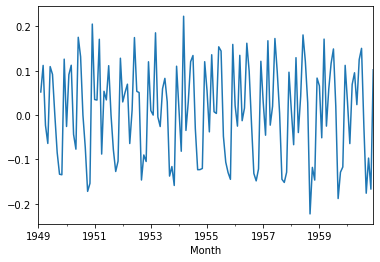

In [125]:
df["DiffLog"].plot();

In [126]:
adf(df["DiffLog"].dropna())

Test Statistic:  -2.7171305983881284
P-Value:  0.0711205481508595
Non-Stationary


In [127]:
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

File ‘sp500sub.csv’ already there; not retrieving.



In [128]:
stocks = pd.read_csv("sp500sub.csv", 
                     index_col="Date", 
                     parse_dates=True)
stocks.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [129]:
goog = stocks[stocks["Name"] == "GOOG"][["Close"]]

In [130]:
goog["LogPrice"] = np.log(goog["Close"])

In [131]:
goog["LogRet"] = goog["LogPrice"].diff()

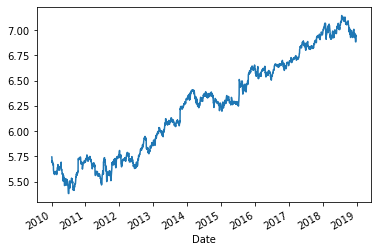

In [132]:
goog["LogPrice"].plot();

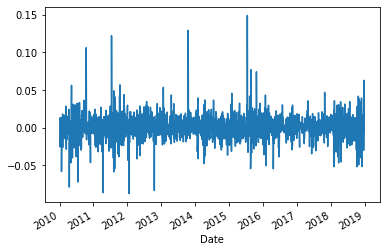

In [133]:
goog["LogRet"].plot();

In [134]:
adf(goog["LogPrice"])

Test Statistic:  -0.41819025789061465
P-Value:  0.9070170677498406
Non-Stationary


In [135]:
adf(goog["LogRet"].dropna())

Test Statistic:  -46.66748022773676
P-Value:  0.0
Stationary


In [136]:
sbux = stocks[stocks["Name"] == "SBUX"][["Close"]]
sbux["LogPrice"] = np.log(sbux["Close"])
sbux["LogRet"] = sbux["LogPrice"].diff()

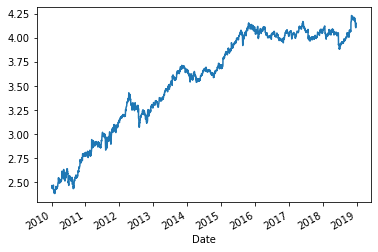

In [137]:
sbux["LogPrice"].plot();

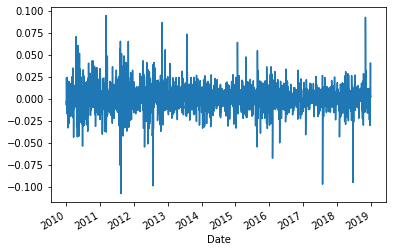

In [138]:
sbux["LogRet"].plot();

In [139]:
adf(sbux["LogPrice"])

Test Statistic:  -1.9020133583900034
P-Value:  0.33111455698537456
Non-Stationary


In [140]:
adf(sbux["LogRet"].dropna())

Test Statistic:  -30.086501426958055
P-Value:  0.0
Stationary


# ACF and PACF

In [141]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [142]:
x0 = np.random.randn(1000)

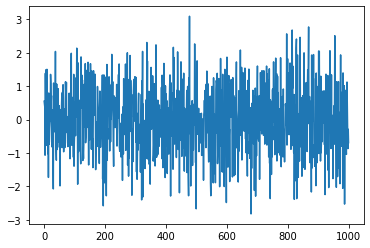

In [143]:
plt.plot(x0);

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


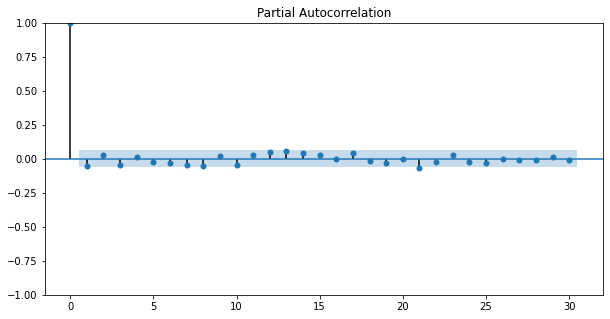

In [144]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x0, ax=ax);

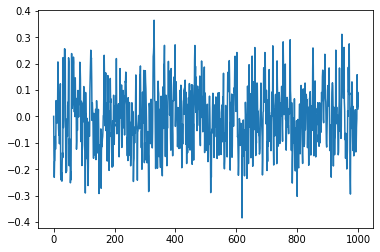

In [145]:
# AR(1) Process
x1 = [0]
for i in range(1000):
  x = 0.5 * x1[-1] + 0.1 * np.random.randn()
  x1.append(x)
x1 = np.array(x1)
plt.plot(x1);

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


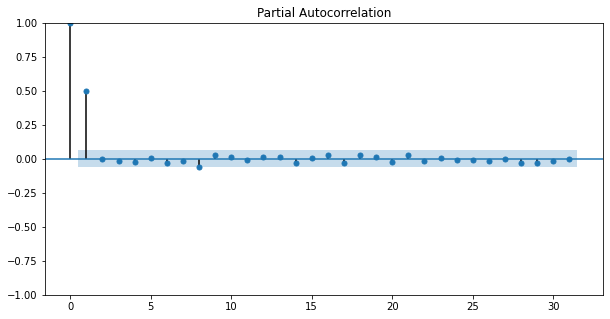

In [146]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x1, ax=ax);

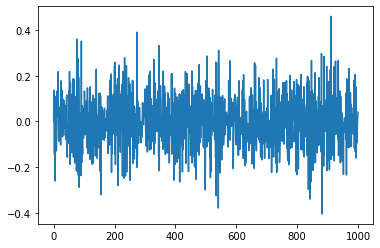

In [147]:
# AR(1) Process
x1 = [0]
for i in range(1000):
  x = -0.5 * x1[-1] + 0.1 * np.random.randn()
  x1.append(x)
x1 = np.array(x1)
plt.plot(x1);

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


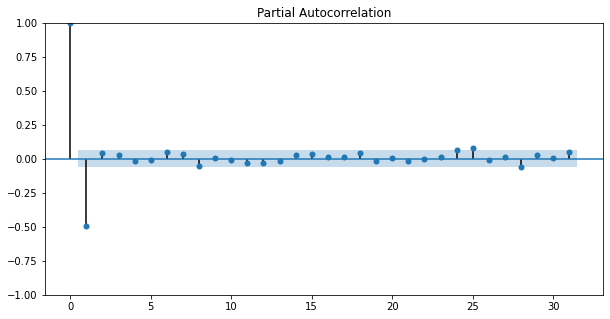

In [148]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x1, ax=ax);

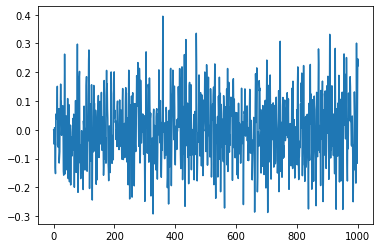

In [149]:
# AR(2) Process
x2 = [0, 0]
for i in range(1000):
  x = 0.5 * x2[-1] - 0.3 * x2[-2] + 0.1*np.random.randn()
  x2.append(x)
x2 = np.array(x2)
plt.plot(x2);

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


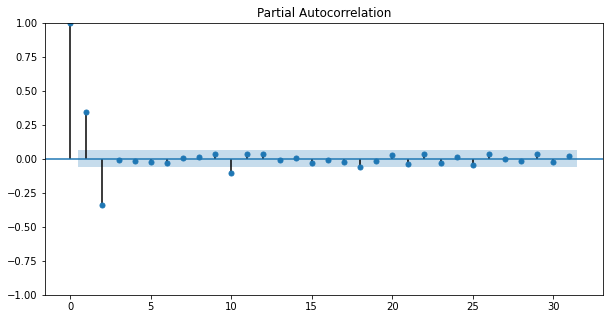

In [150]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x2, ax=ax);

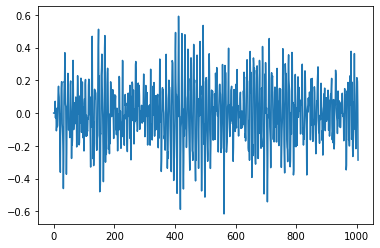

In [151]:
# AR(5) Process
x5 = [0, 0, 0, 0, 0]
for i in range(1000):
  x = 0.5 * x5[-1] - 0.3 * x5[-2] - 0.6 * x5[-5] + 0.1 *np.random.randn()
  x5.append(x)
x5 = np.array(x5)
plt.plot(x5);

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


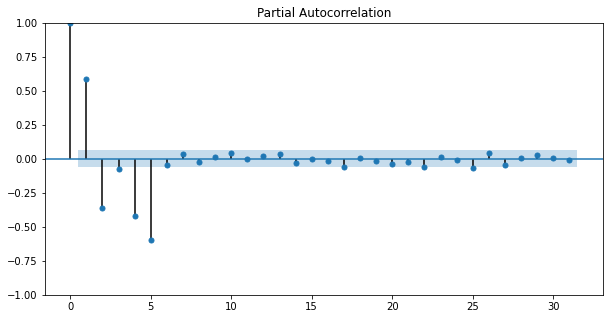

In [152]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(x5, ax=ax);

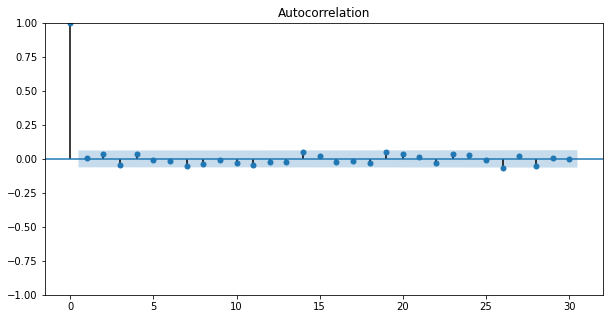

In [153]:
# iid noise
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(np.random.randn(1000), ax=ax);

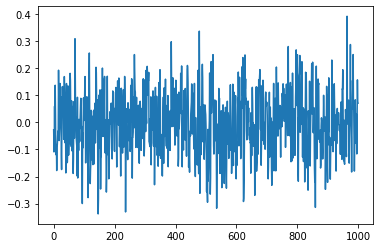

In [154]:
# MA(1) Process
errors = 0.1 * np.random.randn(1000)
ma1 = []
for i in range(1000):
  if i >= 1:
    x = 0.5 * errors[i-1] + errors[i]
  else:
    x = errors[i]
  ma1.append(x)
ma1 = np.array(ma1)
plt.plot(ma1);

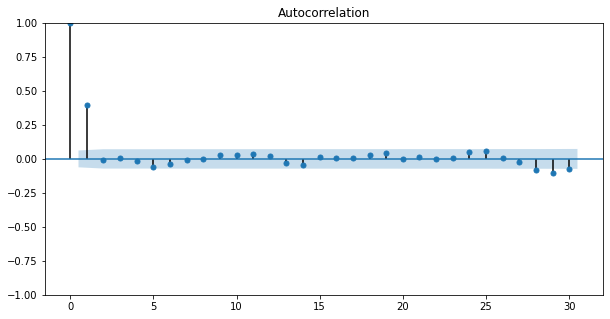

In [155]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(ma1, ax=ax);

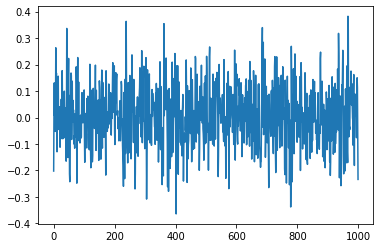

In [156]:
# MA(2) Process
errors = 0.1 * np.random.randn(1000)
ma2 = []
for i in range(1000):
  x = 0.5 * errors[i-1] - 0.3 * errors[i-2] + errors[i]
  ma2.append(x)
ma2 = np.array(ma2)
plt.plot(ma2);

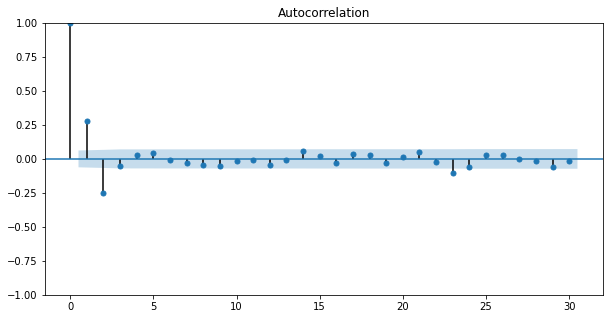

In [157]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(ma2, ax=ax);

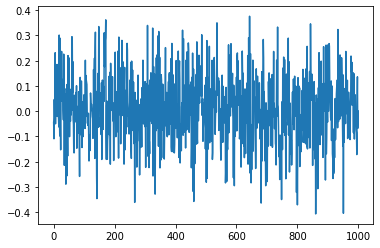

In [158]:
# MA(3) Process
errors = 0.1 * np.random.randn(1000)
ma3 = []
for i in range(1000):
  x = 0.5 * errors[i-1] - 0.3 * errors[i-2] + 0.7 * errors[i-3] + errors[i]
  ma3.append(x)
ma3 = np.array(ma3)
plt.plot(ma3);

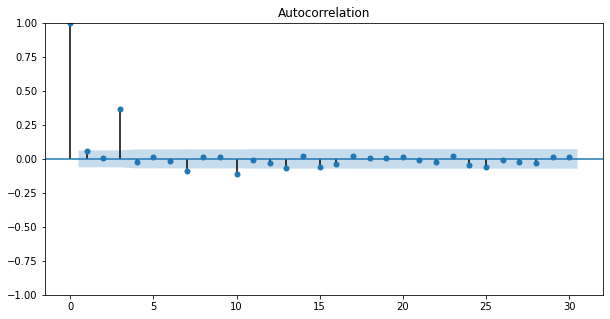

In [159]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(ma3, ax=ax);

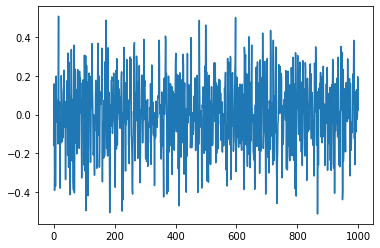

In [160]:
# MA(6) Process
errors = 0.1 * np.random.randn(1000)
ma6 = []
for i in range(1000):
  x = 0.5 * errors[i-1] - 0.3 * errors[i-2] + 0.7 * errors[i-3] + 0.2 * errors[i-4] - 0.8 * errors[i-5] - 0.9 * errors[i-6] + errors[i]  
  ma6.append(x)
ma6 = np.array(ma6)
plt.plot(ma6);

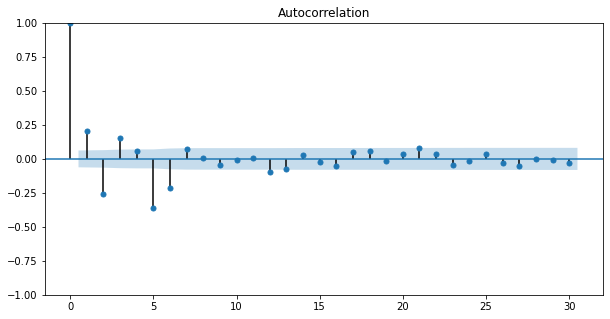

In [161]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(ma6, ax=ax);

## Auto ARIMA

In [162]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

File ‘airline_passengers.csv’ already there; not retrieving.



In [163]:
!pip install --quiet pmdarima

     |████████████████████████████████| 1.4 MB 5.1 MB/s 


In [164]:
df = pd.read_csv("airline_passengers.csv", 
                 index_col="Month", 
                 parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [165]:
df["LogPassengers"] = np.log(df["Passengers"])

In [166]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [167]:
import pmdarima as pm

In [168]:
model = pm.auto_arima(train["Passengers"], 
                      trace=True, 
                      suppress_warnings=True, 
                      seasonal=True, 
                      m=12)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=2.35 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.40 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.39 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.09 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=1.28 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.40 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.55 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.30 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.58 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.14 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.43 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Fri, 13 May 2022   AIC                            905.686
Time:                                    19:21:47   BIC                            919.623
Sample:                                         0   HQIC                           911.346
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [169]:
test_pred, confint = model.predict(n_periods=Ntest, 
                                   return_conf_int=True)

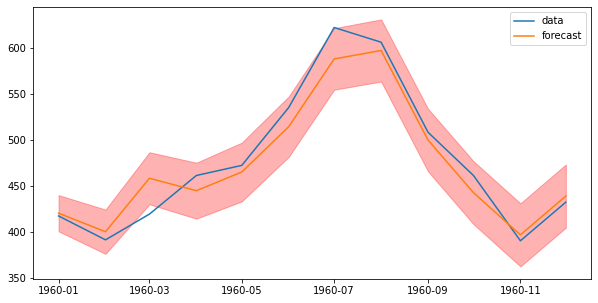

In [170]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test["Passengers"], label="data")
ax.plot(test.index, test_pred, label="forecast")
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color="red", alpha=0.3)
ax.legend();

In [171]:
train_pred = model.predict_in_sample(start=0, end=-1)

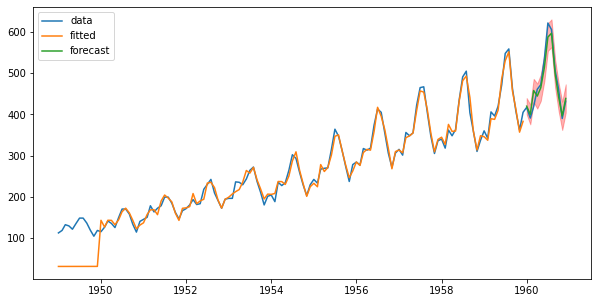

In [172]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df["Passengers"], label="data")
ax.plot(train.index, train_pred, label="fitted")
ax.plot(test.index, test_pred, label="forecast")
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color="red", alpha=0.3)
ax.legend();

In [173]:
logmodel = pm.auto_arima(train["LogPassengers"], 
                         trace=True, 
                         suppress_warnings=True, 
                         seasonal=True, m=12)
logmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-439.894, Time=2.40 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=1.10 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=0.90 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.02 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.316, Time=2.14 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.783, Time=0.83 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.328, Time=5.30 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.714, Time=2.10 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=6.62 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.574, Time=1.68 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.91 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-440.160, Time=2.19 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.511, Time=5.27 sec
 ARIMA(1,0,2)(1,1,0)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Fri, 13 May 2022   AIC                           -448.052
Time:                                      19:32:04   BIC                           -434.114
Sample:                                           0   HQIC                          -442.392
                                              - 132                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0193      0.009      2.159      0.031       0.002       0.037
ar.L1          0.5996      0.083      7.250      0.000       0.438       0.762
ar.L2          0.2417      0.085      2.850      0.004       0.075       0.408
ma.S.L12      -0.5671      0.105     -5.409      0.000      -0.773      -0.362
sigma2         0.0012      0.000      8.181      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.11
Prob(Q):                              1.00   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

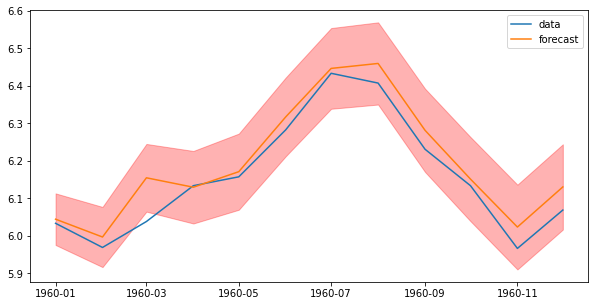

In [174]:
test_pred_log, confint = logmodel.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test["LogPassengers"], label="data")
ax.plot(test.index, test_pred_log, label="forecast")
ax.fill_between(test.index, \
                confint[:, 0], confint[:, 1], \
                color="red", alpha=0.3)
ax.legend();

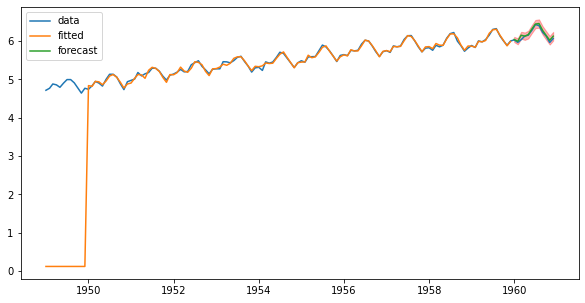

In [175]:
train_pred_log = logmodel.predict_in_sample(start=0, end=-1)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df["LogPassengers"], label="data")
ax.plot(train.index, train_pred_log, label="fitted")
ax.plot(test.index, test_pred_log, label="forecast")
ax.fill_between(test.index, \
                confint[:, 0], confint[:, 1], \
                color="red", alpha=0.3)
ax.legend();

In [178]:
def rmse(t, y):
  return np.sqrt(np.mean((t-y)**2))
print(f"Non-logged RMSE: {rmse(test['Passengers'], test_pred)}")
print(f"Logged RMSE: {rmse(test['Passengers'], np.exp(test_pred_log))}")

Non-logged RMSE: 18.536468779137394
Logged RMSE: 23.063937998797623


In [183]:
# Non-Seasonal Model
model = pm.auto_arima(train["LogPassengers"], 
                      trace=True, 
                      suppress_warnings=True, 
                      max_p=12, 
                      max_q=2, 
                      max_order=14, 
                      stepwise=False, 
                      seasonal=False)
model.summary()

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-211.983, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-216.493, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-214.718, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-221.069, Time=0.40 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-216.622, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-216.024, Time=0.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-245.689, Time=1.52 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-246.300, Time=1.22 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-229.057, Time=0.62 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-227.139, Time=0.76 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-250.912, Time=0.64 sec
 ARIMA(5,1,0)(0,0,0)[0] interc

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 1, 1)   Log Likelihood                 227.577
Date:                Fri, 13 May 2022   AIC                           -425.154
Time:                        19:54:06   BIC                           -382.026
Sample:                             0   HQIC                          -407.630
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0090      0.006      1.433      0.152      -0.003       0.021
ar.L1          0.0170      0.094      0.182      0.856      -0.167       0.201
ar.L2         -0.1009      0.069     -1.465      0.143      -0.236       0.034
ar.L3         -0.0330      0.069     -0.480      0.631      -0.167       0.102
ar.L4         -0.1295      0.074     -1.746      0.081      -0.275       0.016
ar.L5          0.0002      0.068      0.003      0.998      -0.133       0.133
ar.L6         -0.0840      0.068     -1.243      0.214      -0.216       0.048
ar.L7         -0.0533      0.074     -0.720      0.471      -0.198       0.092
ar.L8         -0.1295      0.068     -1.912      0.056      -0.262       0.003
ar.L9         -0.0129      0.081     -0.159      0.873      -0.171       0.145
ar.L10        -0.0992      0.066     -1.502      0.133      -0.229       0.030
ar.L11         0.0132      0.074      0.179      0.858      -0.131       0.158
ar.L12         0.7712      0.063     12.198      0.000       0.647       0.895
ma.L1         -0.3601      0.130     -2.768      0.006      -0.615      -0.105
sigma2         0.0016      0.000      7.199      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.05
Prob(Q):                              0.99   Prob(JB):                         0.36
Heteroskedasticity (H):               0.37   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

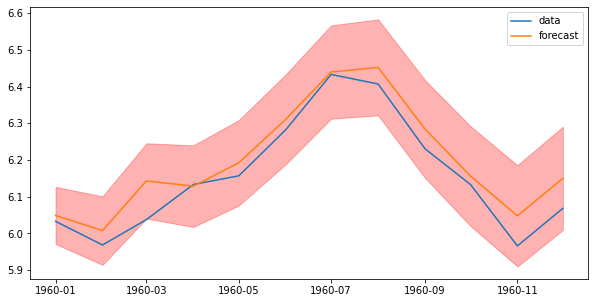

In [184]:
test_pred, confint = model.predict(n_periods=Ntest, 
                                   return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test["LogPassengers"], label="data")
ax.plot(test.index, test_pred, label="forecast")
ax.fill_between(test.index, \
                confint[:, 0], confint[:, 1], \
                color="red", alpha=0.3)
ax.legend();

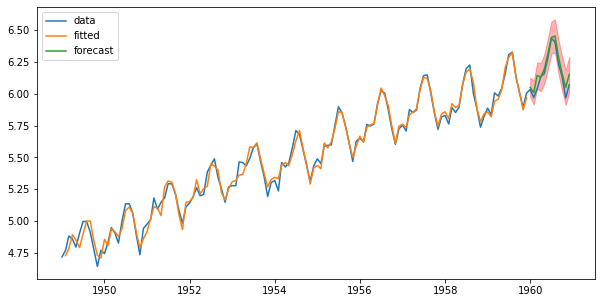

In [186]:
train_pred = model.predict_in_sample(start=1, end=-1)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df["LogPassengers"], label="data")
ax.plot(train.index[1:], train_pred, label="fitted")
ax.plot(test.index, test_pred, label="forecast")
ax.fill_between(test.index, \
                confint[:, 0], confint[:, 1], \
                color="red", alpha=0.3)
ax.legend();

In [187]:
rmse(test["Passengers"], np.exp(test_pred))

24.426786924042126